# Flywire Dataset Introduction

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from connectome_tools.connectome_loaders import load_flywire
from connectome_tools.filter_connectivity import filter_connectivity

## Loading in the data

Go to https://codex.flywire.ai/api/download (you will need to login, a google account will work fine, no approval needed) to download and unzip:
- neurons
- classification
- connections
- and optionally: 
    - names
    - coordinates
    - cell_stats
    - synapse_coordinates

Put the all csvs in a folder and set data_path below equal to the path to your folder

In [2]:
# REPLACE WITH YOUR DATA PATH
data_path = "/Users/chase/Documents/science/drosophila/connectomes/flywire"

We will now load in the data using our [connectome_tools](https://github.com/alitwinkumar/connectome_tools) package, so please make sure to download and install it in your environment.

In [3]:
neurons, J, nts_Js = load_flywire(data_path, by_nts=True, include_spatial=True)

## Inspecting the data

What do we have now? We see that load_flywire returns the following:

In [4]:
help(load_flywire)

Help on function load_flywire in module connectome_tools.connectome_loaders:

load_flywire(datapath, by_nts=False, include_spatial=False, J_matrix_dtype='int16')
    Load the flywire connectome dataset.
    You will need to manually download files from https://codex.flywire.ai/api/download and extract.
    The required files are "neurons.csv", "connections.csv", and "classification.csv".
    If you want to include spatial information, you will also need to download "coordinates.csv".
    
    Args:
        datapath (path-like): Local path for dataset.
        by_nts (bool, optional): Whether to also return a dictionary mapping neurotransmitter type to a J matrix for those transmitters. Defaults to False.
        include_spatial (bool, optional): Whether to include neuron position information. Defaults to False.
        J_matrix_dtype (str, optional): Data type for the synaptic connectivity matrix. Defaults to "int16". Sparse matrix default is int64 but max synapse count appears to be 2

### Inspecting neurons

In [5]:
print(neurons.columns)
neurons

Index(['root_id', 'group', 'nt_type', 'nt_type_score', 'da_avg', 'ser_avg',
       'gaba_avg', 'glut_avg', 'ach_avg', 'oct_avg', 'flow', 'super_class',
       'class', 'sub_class', 'cell_type', 'hemibrain_type', 'hemilineage',
       'side', 'nerve', 'x', 'y', 'z', 'x_presyn', 'y_presyn', 'z_presyn',
       'rho_presyn', 'x_postsyn', 'y_postsyn', 'z_postsyn', 'rho_postsyn',
       'J_idx', 'J_idx_post', 'J_idx_pre'],
      dtype='object')


,root_id,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,oct_avg,...,y_presyn,z_presyn,rho_presyn,x_postsyn,y_postsyn,z_postsyn,rho_postsyn,J_idx,J_idx_post,J_idx_pre
0,720575940596125868,LO.LOP,ACH,0.57,0.03,0.00,0.05,0.28,0.57,0.07,...,272101.653061,222686.938776,4042.849284,704764.909091,264664.323232,207074.343434,7845.089935,0,0,0
1,720575940597856265,ME,ACH,0.85,0.01,0.00,0.03,0.04,0.85,0.07,...,332566.478803,182284.339152,59616.487007,794721.243243,343001.924324,196943.351351,32958.807523,1,1,1
2,720575940597944841,ME.LO,ACH,0.82,0.02,0.00,0.01,0.05,0.82,0.09,...,315764.235294,162995.686275,51912.273723,768345.622642,334740.452830,167122.641509,39562.699008,2,2,2
3,720575940598267657,ME,GABA,0.74,0.01,0.01,0.74,0.19,0.03,0.02,...,291869.890909,153360.000000,49137.756450,702150.015000,288316.140000,164957.700000,49340.892492,3,3,3
4,720575940599333574,ME,ACH,0.61,0.02,0.00,0.13,0.13,0.61,0.11,...,301811.971919,131105.304212,29792.392699,723454.892086,307819.510791,105889.352518,15150.823995,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139250,720575940661335681,GNG,GABA,0.71,0.00,0.00,0.71,0.17,0.11,0.00,...,332268.832413,170605.635359,22030.222650,471771.563574,330821.182131,180653.195876,26858.437893,139250,139250,139250
139251,720575940661336193,ME.LO,ACH,0.62,0.02,0.00,0.18,0.16,0.62,0.03,...,187984.468085,224998.085106,24874.241616,262816.598575,171916.232779,206693.444181,11112.210147,139251,139251,139251
139252,720575940661337217,SCL.MB_ML,ACH,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,163719.617284,104021.358025,48225.795949,435520.126582,147925.113924,144886.835443,52048.823650,139252,139252,139252
139253,720575940661338497,GNG,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,539015.644643,338405.019643,73517.160714,50811.319161,139253,139253,139253


The columns 'nt_type_score', 'da_avg', 'ser_avg',
       'gaba_avg', 'glut_avg', 'ach_avg', 'oct_avg' in neurons are the neurotransmitter prediction score. We won't use those so we remove them now.

Now we can see all the columns.

What are these columns?
- 'root_id': unique identifier for each neuron. You can find search using this identifier in [flywire.ai](flywire.ai)
- 'group': auto-generated group (based on primary input and output neuropils)
- 'nt_type': from neurons.csv -- the predicted neurotransmitter type
- 'flow', 'super_class', 'class', 'sub_class', 'cell_type', 'hemibrain_type', 'hemilineage', 'side', 'nerve': From classification.csv. See description on the [download page](https://codex.flywire.ai/api/download). These tend to be the most useful for selecting subsets of neurons so we will explore these in this notebook.
- 'x', 'y', 'z': Average entries for each root_id from coordinates.csv. From the download data page "Marked neuron coordinates. FlyWire Supervoxel IDs and position coordinates (in nanometers) for cells in the dataset. One cell might have zero or more coordinates and supervoxel IDs, depending on marked positions during human proofreading / cell identification. The coordinates usually point to spots that were most useful for human review, and not necessarily to the cell body / soma. "
- 'x_presyn', 'y_presyn', 'z_presyn','x_postsyn', 'y_postsyn', 'z_postsyn': Average entries for each pre_root_id / post_root_id from synapse_coordinates.csv. '_presyn' is the average of the outgoing synapses, and '_postsyn' is the average of the incoming synapses.
- 'rho_presyn' and 'rho_postsyn' are the standard deviation of outgoing and incoming synapse locations respectively.
- 'J_idx', 'J_idx_post', 'J_idx_pre': The correspondence between the index in the connectivity matrix `J` and the neurons in `neurons`. Right now these three columns are identical, but that may not be the case if we use `filter_connectivity` later on.

In [6]:
neurons = neurons.drop(['nt_type_score', 'da_avg', 'ser_avg',
       'gaba_avg', 'glut_avg', 'ach_avg', 'oct_avg'], axis=1)
neurons

,root_id,group,nt_type,flow,super_class,class,sub_class,cell_type,hemibrain_type,hemilineage,...,y_presyn,z_presyn,rho_presyn,x_postsyn,y_postsyn,z_postsyn,rho_postsyn,J_idx,J_idx_post,J_idx_pre
0,720575940596125868,LO.LOP,ACH,intrinsic,optic,NaN,NaN,T5c,NaN,NaN,...,272101.653061,222686.938776,4042.849284,704764.909091,264664.323232,207074.343434,7845.089935,0,0,0
1,720575940597856265,ME,ACH,intrinsic,optic,NaN,NaN,Tm16,NaN,NaN,...,332566.478803,182284.339152,59616.487007,794721.243243,343001.924324,196943.351351,32958.807523,1,1,1
2,720575940597944841,ME.LO,ACH,intrinsic,optic,NaN,NaN,CB3851,NaN,NaN,...,315764.235294,162995.686275,51912.273723,768345.622642,334740.452830,167122.641509,39562.699008,2,2,2
3,720575940598267657,ME,GABA,intrinsic,optic,NaN,NaN,TmY15,NaN,NaN,...,291869.890909,153360.000000,49137.756450,702150.015000,288316.140000,164957.700000,49340.892492,3,3,3
4,720575940599333574,ME,ACH,intrinsic,optic,NaN,NaN,Tm1,NaN,NaN,...,301811.971919,131105.304212,29792.392699,723454.892086,307819.510791,105889.352518,15150.823995,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139250,720575940661335681,GNG,GABA,intrinsic,central,NaN,NaN,CB0180,NaN,MX12__prim,...,332268.832413,170605.635359,22030.222650,471771.563574,330821.182131,180653.195876,26858.437893,139250,139250,139250
139251,720575940661336193,ME.LO,ACH,intrinsic,optic,NaN,NaN,TmY3,NaN,NaN,...,187984.468085,224998.085106,24874.241616,262816.598575,171916.232779,206693.444181,11112.210147,139251,139251,139251
139252,720575940661337217,SCL.MB_ML,ACH,intrinsic,central,Kenyon_Cell,NaN,NaN,KCab-p,MBp4,...,163719.617284,104021.358025,48225.795949,435520.126582,147925.113924,144886.835443,52048.823650,139252,139252,139252
139253,720575940661338497,GNG,NaN,efferent,motor,NaN,NaN,CB0904,NaN,putative_primary,...,NaN,NaN,NaN,539015.644643,338405.019643,73517.160714,50811.319161,139253,139253,139253


### Inspecting J

J is the connection matrix from neuron i to neuron j is the entry `J[j,i]`. That is, the rows are postsynaptic and the columns are presynaptic.

Inspecting J, we notice that it is formatted as a sparse matrix. This helps with efficiency since it is a large and sparse matrix. 

In [7]:
J

<139255x139255 sparse matrix of type '<class 'numpy.int16'>'
	with 3869878 stored elements in Compressed Sparse Row format>

However, we can also convert it to a numpy array using `todense`. It takes ~16s on the full array, so I will do this on a subset of J to demonstrate:

In [8]:
J[:200].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

### Inspecting nts_Js
nts_Js is a dictionary of matrices indexed by neurotransmitter type.

ACH (acetylcholine) is normally considered to be excitatory, GABA inhibitory, and GLUT (glutamate) is normally assumed to be inhibitory in the *Drosophila* central brain. The other neurotransmitters DA (dopamine), OCT (octopamine), and SER (serotonin) are neuromodulators and likely have different types of effects (e.g. plasticity in the case of dopamine).

In [9]:
nts_Js

{'ACH': <139255x139255 sparse matrix of type '<class 'numpy.int16'>'
 	with 2258155 stored elements in Compressed Sparse Row format>,
 'DA': <139255x139255 sparse matrix of type '<class 'numpy.int16'>'
 	with 37705 stored elements in Compressed Sparse Row format>,
 'GABA': <139255x139255 sparse matrix of type '<class 'numpy.int16'>'
 	with 865318 stored elements in Compressed Sparse Row format>,
 'GLUT': <139255x139255 sparse matrix of type '<class 'numpy.int16'>'
 	with 654183 stored elements in Compressed Sparse Row format>,
 'OCT': <139255x139255 sparse matrix of type '<class 'numpy.int16'>'
 	with 17067 stored elements in Compressed Sparse Row format>,
 'SER': <139255x139255 sparse matrix of type '<class 'numpy.int16'>'
 	with 37450 stored elements in Compressed Sparse Row format>}

## Minor data preprocessing

Here, we filter out connections with fewer than 10 synapses between them. You can choose a different threshold, this threshold is based on [Schlegel et al., 2023](https://doi.org/10.1101/2023.06.27.546055)


In [10]:
# filter connectivity so we only keep connections with >=10 synapses:
J= J*(J>=10)

for key, val in nts_Js.items():
    nts_Js[key] = val*(val>=10)

In [11]:
# sort neurons by neuron type for better viewing
neurons = neurons.sort_values(['super_class', 'class', 'sub_class', 'hemibrain_type', 'cell_type','hemilineage','side']).reset_index(drop=True)

## Normalizing J matrices e.g. for calculating flow

Right now, J is a matrix of integer synapse counts from 0-28982 . However, it is often useful to normalize J so that the input to each neuron sums to 1. Multiplying this normalized J matrix by inputs from all neurons gives all ones except for ~15,000 neurons which receives no input from the brain.

In [12]:
def row_norm(A):
    """Normalize a matrix by its row sums.

    Args:
        A (scipy sparse matrix): Input matrix

    Returns:
        scipy sparse matrix: A, normalized such that sum_j A_ij = 1 for all i except where the row sum is 0.
    """
    x = A.sum(axis=1)
    x[x == 0] = 1
    return A / x

In [13]:
normalized_J = row_norm(J)

# Verify the row sums are as intended
normalized_J @ np.ones(J.shape[0])

array([1., 1., 1., ..., 1., 1., 0.])

## Signed J matrix
We may also want to take into account the neurotransmitter predictions when creating our connection matrix. Now there are multiple ways to normalize. One way, below is to make it so the absolute input to each neuron sums to 1.

In [14]:
signed_J = row_norm(nts_Js['ACH'] - nts_Js['GABA'] - nts_Js['GLUT'])

signed_J @ np.ones(J.shape[0])

array([1., 1., 1., ..., 1., 1., 0.])

Another way could be to normalize such that the excitatory inputs sum to 1 and the inhibitory inputs sum to -1, as below:

In [15]:
signed_J_EInorm = row_norm(nts_Js['ACH']) - row_norm(nts_Js['GABA'] + nts_Js['GLUT'])

signed_J_EInorm@np.ones(J.shape[0])

array([ 2.77555756e-17, -5.55111512e-17, -2.58473798e-16, ...,
        2.22044605e-16,  3.57786717e-18,  0.00000000e+00])

In general, we don't know the relative weight of the different synapse types, so there are many different possible relative weightings of E and I synapses.

## Interesting subsets of neurons

For the purposes of this hackathon, it may be best to consider subsets of the data so that data size is not prohibitive. Below, we introduce some regions of interest and how to extract them.

#### some plotting functions
These aren't polished, but should let you get a quick sense of data.

In [16]:
def get_group_by(neurons):
    group_by = []
    for col in ['flow', 'super_class', 'class', 'sub_class', 'hemibrain_type', 'cell_type', 'hemilineage', 'side', 'nerve']:
        for name, df in neurons.groupby(group_by, dropna=False) if len(group_by) else [('', neurons)]:
            if (len(df[col].unique()))>2 or ((len(df[col].unique()))>1 and sum([type(x)== float for x in df[col].unique()])==0):
                group_by.append(col)
                break
    return group_by

def plot_connection_probability(pre,post,J, include_xticks=True, include_yticks=True):
    group_by_pre = get_group_by(pre)[:2]
    group_by_post = get_group_by(post)[:2]
    pre_tick_names = []
    probabilities = np.zeros(shape=(len(post.groupby(group_by_post,dropna=False)), len(pre.groupby(group_by_pre,dropna=False))))
    for j,(pre_name, pre_df) in enumerate(pre.groupby(group_by_pre,dropna=False)):
        pre_tick_names.append(pre_name)
        post_tick_names = []
        for i, (post_name, post_df) in enumerate(post.groupby(group_by_post, dropna=False)):
            post_tick_names.append(post_name)
            probabilities[i,j] = np.mean(J[post_df.J_idx_post][:,pre_df.J_idx_pre]>0)

    sns.heatmap(probabilities)
    if include_xticks:
        plt.gca().set_xticks(np.asarray(range(len(pre_tick_names)))+.5, pre_tick_names, rotation = 90)
    else:
        plt.gca().set_xticks([],[])
    if include_yticks:
        plt.gca().set_yticks(np.asarray(range(len(post_tick_names)))+.5, post_tick_names, rotation = 0)
    else:
        plt.gca().set_yticks([],[])

def plot_connectivity(pre,post,J, input_tick_labels=float('inf'), output_tick_labels=float('inf'), output_label='', input_label = ''):
    group_by_pre = get_group_by(pre)
    group_by_post = get_group_by(post)
    pre.index = pre.J_idx_pre
    post.index = post.J_idx_post

    # group_by = group_by[:2]
    label_width = int(max(len(pre)  , len(post))/40)
    f,axs = plt.subplots(len(group_by_pre) + 1, len(group_by_post) + 1,  
                         figsize=(16*((len(pre) + len(group_by_post)*label_width)/max(len(pre)  , len(post))),16*(len(post) + len(group_by_pre)*label_width)/max(len(pre),len(post))),
                         gridspec_kw={'height_ratios': [len(post)] + [label_width]*len(group_by_pre), 'width_ratios': [len(pre)]+[label_width]*len(group_by_post)})
    # plt.subplots_adjust(wspace=label_width*2/len(pre), hspace=label_width*2/(len(post)))
    axs[0,0].imshow(J)

    for vertical in [False,True]:
        if vertical:
            t = post
            other_t = pre
            group_by = group_by_post
        else:
            t= pre
            other_t = post
            group_by = group_by_pre
        for i in range(len(group_by)):
            if vertical:
                ax = axs[0,len(axs[0])-1-i]

            else:
                ax= axs[len(axs)-1-i, 0]
        
            group_labels = np.zeros((len(t),label_width))
            x_ticks = []
            x_tick_labels = []
            name_to_color = {}
            for j, (name, df) in enumerate(t.groupby(group_by[0:i+1])):
                name = name if type(name)==str else name[-1]
                if not name in (name_to_color.keys()):
                    name_to_color[name] = j
                    x_ticks.append(np.min(df.index)+len(df)/2)
                    x_tick_labels.append(name)
                
                group_labels[df.index] = name_to_color[name]
                # x_ticks.append(np.min(df.index)+len(df)/2)
                # x_tick_labels.append(name)
            if vertical:
                ax.imshow(group_labels)
                ax.set_xlabel(group_by[i], rotation =90)
                ax.set_xticks([],[])
                if  i <output_tick_labels:
                    ax.set_yticks(x_ticks, x_tick_labels, rotation=30)
                else:
                    ax.set_yticks([],[])
                ax.yaxis.tick_right()
                # ax.yaxis.set_label_position("right")
            else:
                ax.imshow(group_labels.T)
                ax.set_yticks([],[])
                ax.set_ylabel(group_by[i], rotation=45)
                if  i <input_tick_labels:
                    ax.set_xticks(x_ticks, x_tick_labels, rotation=30)
                else:
                    ax.set_xticks([],[])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)

    # f.tight_layout()
    axs[-1,0].set_xlabel(input_label)
    axs[0,-1].set_ylabel(output_label)
    axs[0,-1].yaxis.set_label_position("right")
    for axi in axs[1:,1:]:
        for ax in axi:
            ax.axis('off')

    plt.tight_layout()

### Ring neurons

Ring neurons are neurons with a physical ring structure in the central complex, a region known to be important for navigation. Ring neurons are known to receive visual input, and some ring neuron types are known to modulate sleep ([Hulse et al., 2021](https://elifesciences.org/articles/66039/figures#content)).

The below plot shows the synapse count from each neuron in a column to each neuron in a row. The bars to the side and below color code different types of neurons.

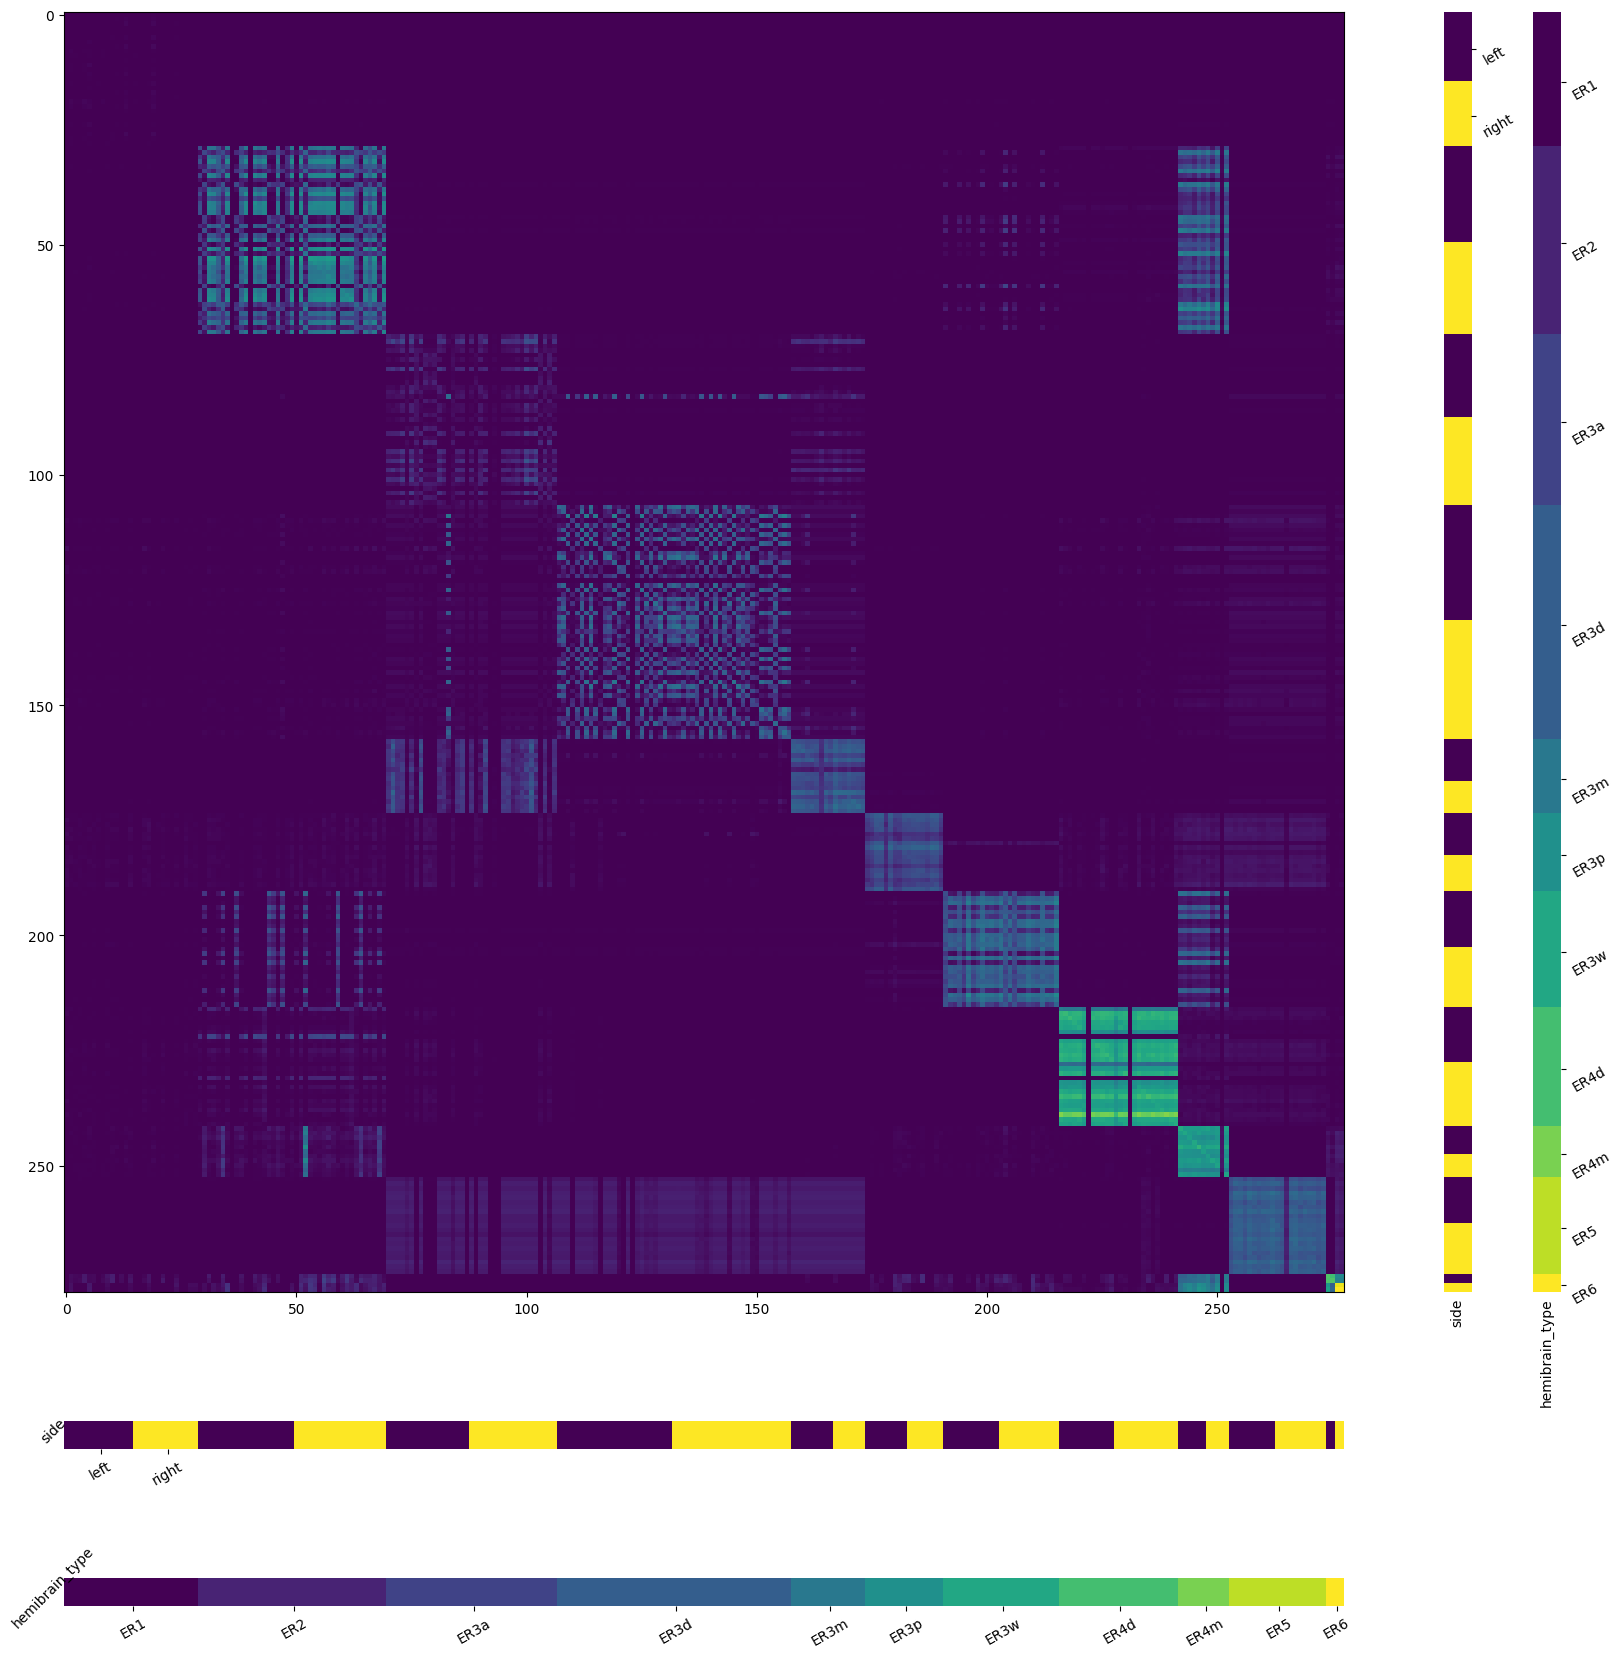

In [17]:
ring_neurons = neurons[neurons.sub_class=='ring_neuron']
ring_neurons, ring_J, ring_neurons_pre, ring_neurons_post, ring_nts_Js = filter_connectivity(ring_neurons,ring_neurons, J, nts_Js)
plot_connectivity(ring_neurons_pre, ring_neurons_post, ring_J.todense())

In [18]:
help(filter_connectivity)

Help on function filter_connectivity in module connectome_tools.filter_connectivity:

filter_connectivity(filtered_neurons_pre, filtered_neurons_post, J, nts_Js=None)
    Filter the connectivity matrix, J, to only include presynaptic neurons in filtered_neurons_pre, and post synaptic neurons in filtered_neurons_post.
    filtered_neurons_pre and filtered_neurons_post are dataframes as loaded by connectome_loaders.py
    J is a sparse or dense connectivity matrix, as returned by connectome_loaders.py, or previous passes to filter_connectivity.
    nts_Js is a dictionary of sparse or dense connectivity matrices, as returned by connectome_loaders.py when by_nts is True, or by previous passes to filter_connectivity with nts_Js included
    returns: 
        neurons, a dataframe containing included neuron IDs and information with J_idx_pre and J_idx_post updated to match the filtered J matrix, with -1 indicating not included
        filtered_J, a synaptic connectivity matrix (rows postsynap

### Sparse & high dimensional odor representation

Olfactory projection neurons (PNs) connect to Kenyon Cells (KCs) sparsely and randomly, leading to an expanded representation of odors that is useful for learning [(Litwin-Kumar et al. 2017)](https://www.cell.com/neuron/pdf/S0896-6273(17)30054-5.pdf)

/var/folders/8l/944wpj6s7sq8gcv57wcd3q6h0000gn/T/ipykernel_69396/4185879472.py:107: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


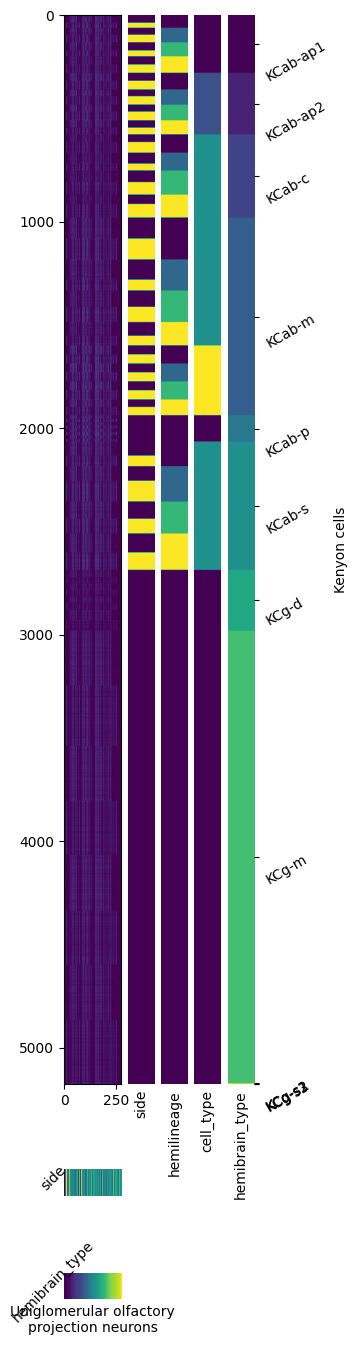

In [19]:
pns=neurons[(neurons['class']=='ALPN') & (neurons['sub_class']=='uniglomerular')]
kcs=neurons[neurons['class']=='Kenyon_Cell']
pnkc_neurons, pnkc_J, pnkc_neurons_pre, pnkc_neurons_post, pnkc_nts_Js = filter_connectivity(pns,kcs, J, nts_Js)
plot_connectivity(pnkc_neurons_pre, pnkc_neurons_post, pnkc_J.todense(), input_tick_labels=0, output_tick_labels=1, output_label="Kenyon cells", input_label = "Uniglomerular olfactory\nprojection neurons")


The below plot shows the probability that there is a connection from a given neuron of a type (columns) to a given neuron of a type (rows).

Text(0.5, 23.52222222222222, 'Uniglomerular olfactory projection neurons')

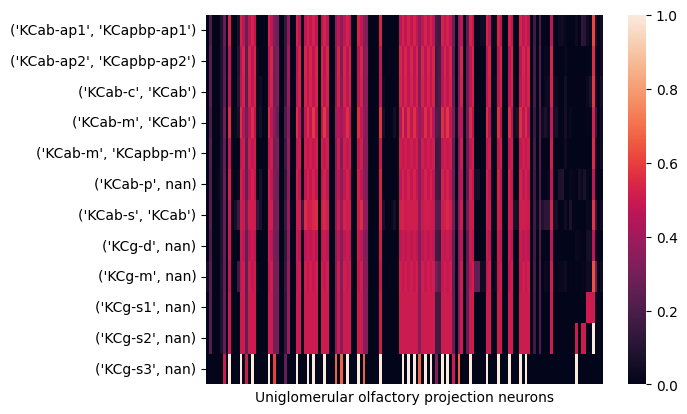

In [20]:
plot_connection_probability(pnkc_neurons_pre, pnkc_neurons_post, pnkc_J.todense(), include_xticks=False)
plt.xlabel('Uniglomerular olfactory projection neurons')

### Head direction circuit: Central Complex ellipsoid body to protocerebral bridge

The PEN below were shown in [Hulse et al., 2021](https://elifesciences.org/articles/66039/figures#content) Fig 17 Ci/Cii to have shifted connectivity based on their positions along protocerebral bridge (a structure important for transforming from egocentric to allocentric coordinates) to their corresponding ellipsoid body neuron (a ring attractor structure important for representing egocentric heading direction)

However, the dataset shown in Hulse is a different connectome, from a different fly. In the flywire connectome, the geometry hasn't been labeled in the neurons so we can't see the connectivity pattern seen in Hulse. We do have some geometric information about neuron position (displayed below).

One potential project could be to try to recover the organization shown in Hulse with this connectome using connectivity information or the spatial location or some combination.

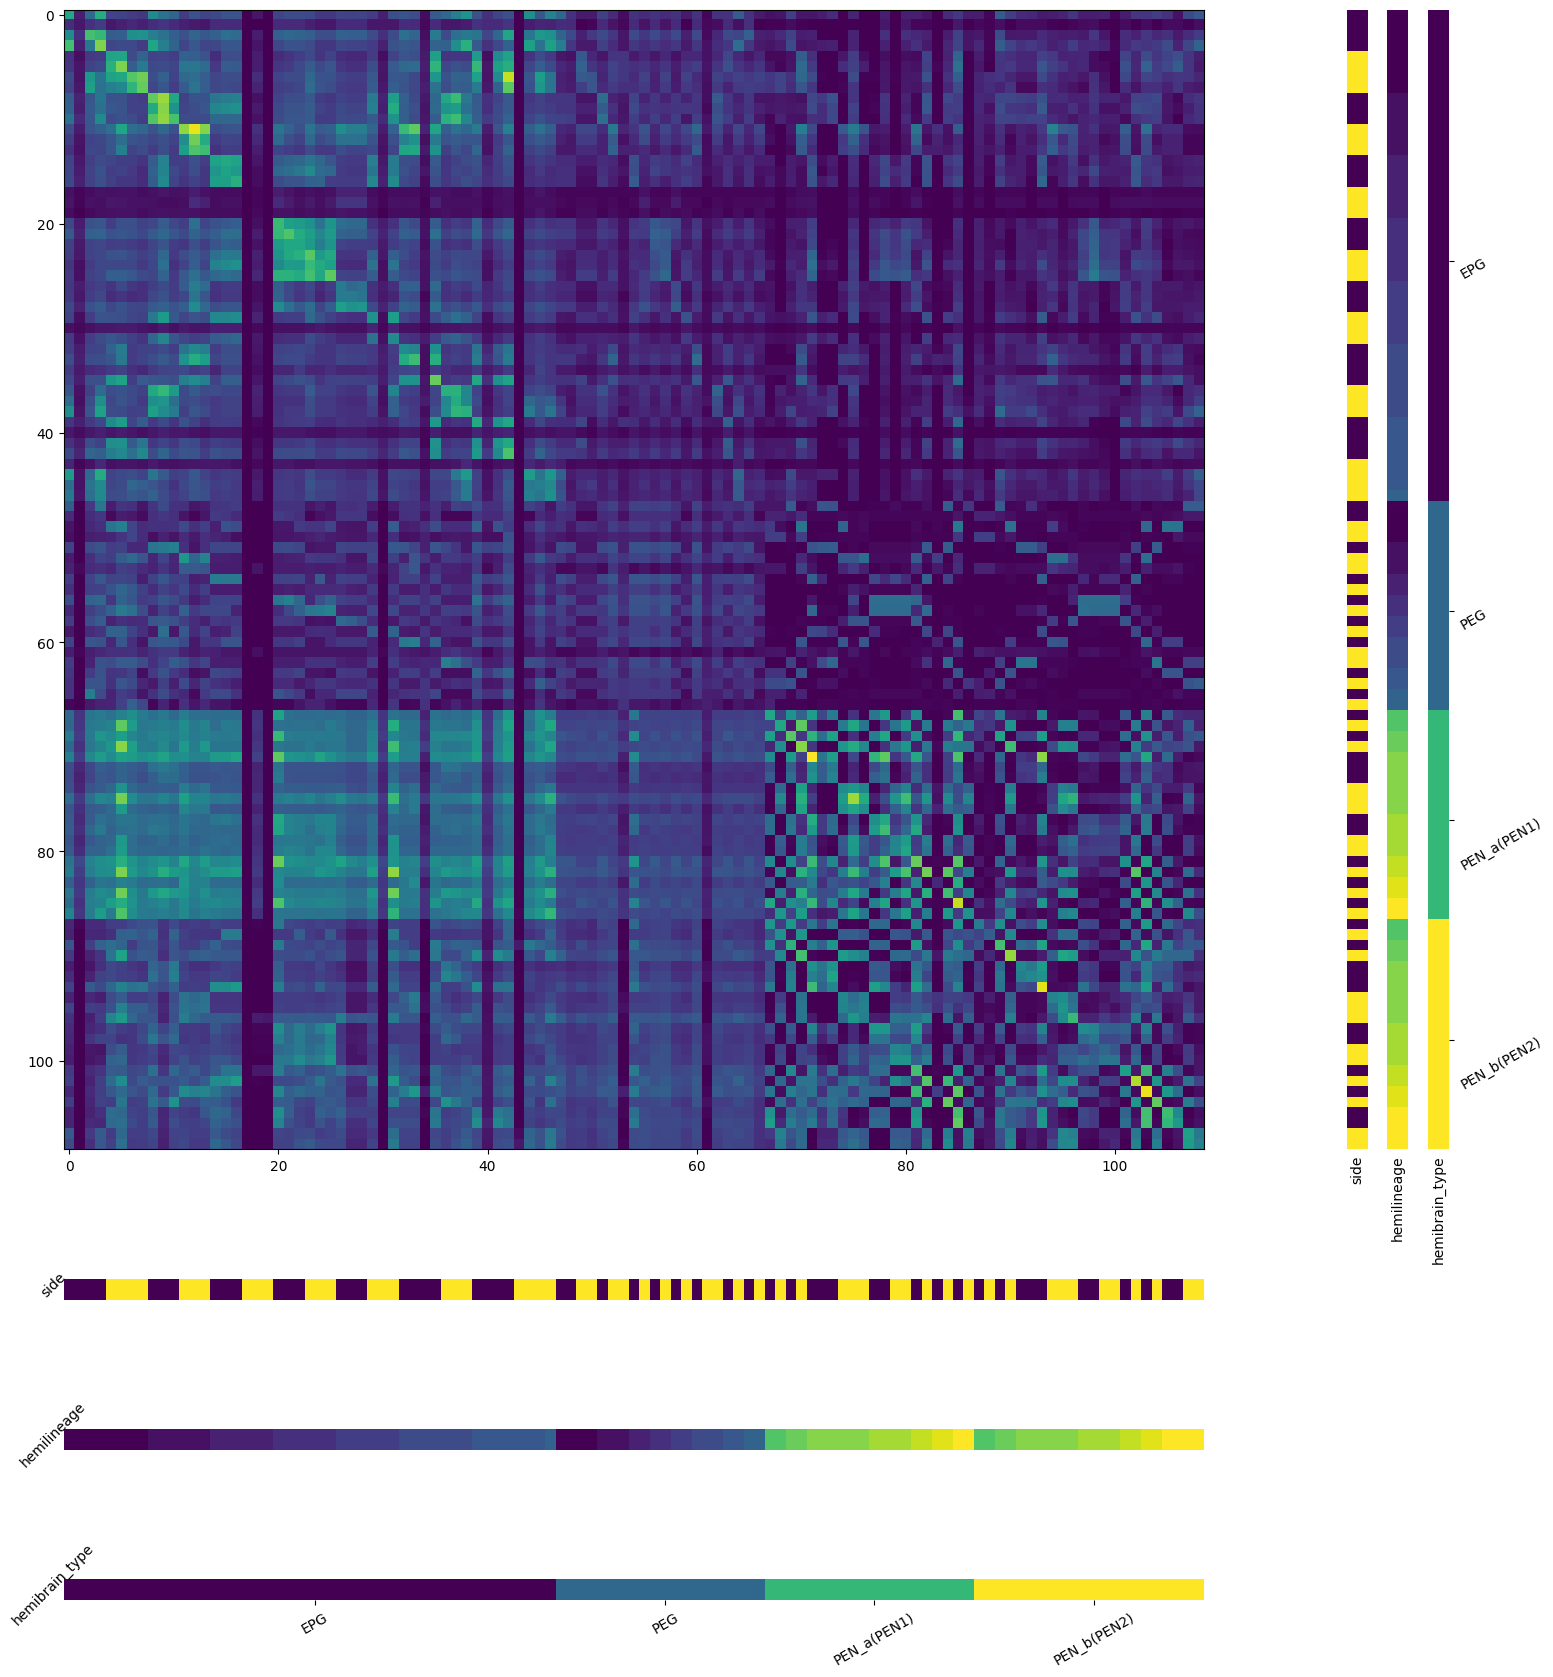

In [21]:
hulse_fig17=neurons[(neurons['hemibrain_type']=='EPG') | (neurons['hemibrain_type']=='PEG')| neurons.hemibrain_type.apply(lambda x: 'PEN' in str(x))]

hulse_fig17_neurons, hulse_fig17_J, hulse_fig17_neurons_pre, hulse_fig17_neurons_post, hulse_fig17_nts_Js = filter_connectivity(hulse_fig17,hulse_fig17, J, nts_Js)
plot_connectivity(hulse_fig17_neurons_pre, hulse_fig17_neurons_post, hulse_fig17_J.todense(), input_tick_labels=1, output_tick_labels=1)

Text(0.5, 0.92, 'Mean coordinates of incoming synapses')

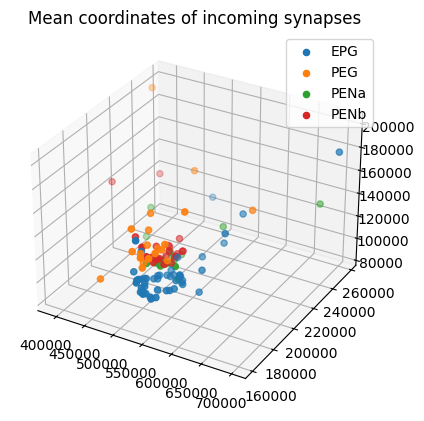

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(hulse_fig17[hulse_fig17['hemibrain_type']=='EPG'].x_postsyn, hulse_fig17[hulse_fig17['hemibrain_type']=='EPG'].y_postsyn, hulse_fig17[hulse_fig17['hemibrain_type']=='EPG'].z_postsyn, label='EPG')
ax.scatter(hulse_fig17[hulse_fig17['hemibrain_type']=='PEG'].x_postsyn, hulse_fig17[hulse_fig17['hemibrain_type']=='PEG'].y_postsyn, hulse_fig17[hulse_fig17['hemibrain_type']=='PEG'].z_postsyn, label='PEG')
ax.scatter(hulse_fig17[hulse_fig17['hemibrain_type'].apply(lambda x: 'PEN1' in x)].x_postsyn, hulse_fig17[hulse_fig17['hemibrain_type'].apply(lambda x: 'PEN1' in x)].y_postsyn, hulse_fig17[hulse_fig17['hemibrain_type'].apply(lambda x: 'PEN1' in x)].z_postsyn, label='PENa')
ax.scatter(hulse_fig17[hulse_fig17['hemibrain_type'].apply(lambda x: 'PEN2' in x)].x_postsyn, hulse_fig17[hulse_fig17['hemibrain_type'].apply(lambda x: 'PEN2' in x)].y_postsyn, hulse_fig17[hulse_fig17['hemibrain_type'].apply(lambda x: 'PEN2' in x)].z_postsyn, label='PENb')
plt.legend()
plt.title('Mean coordinates of incoming synapses')

### Fan-shaped body tangential and columnar neurons: Goal directed navigation?

We can extract the tangential and columnar neurons in the fan-shaped body thought to be important for goal directed navigation -- the columnar neurons are arranged in columns corresponding to directions in the world, whereas the tangential neurons connect across these columns, potentially modulating goal signals.

There are many neurons so it does not display particularly well, so we can also instead plot the connection probability between different types of neurons.



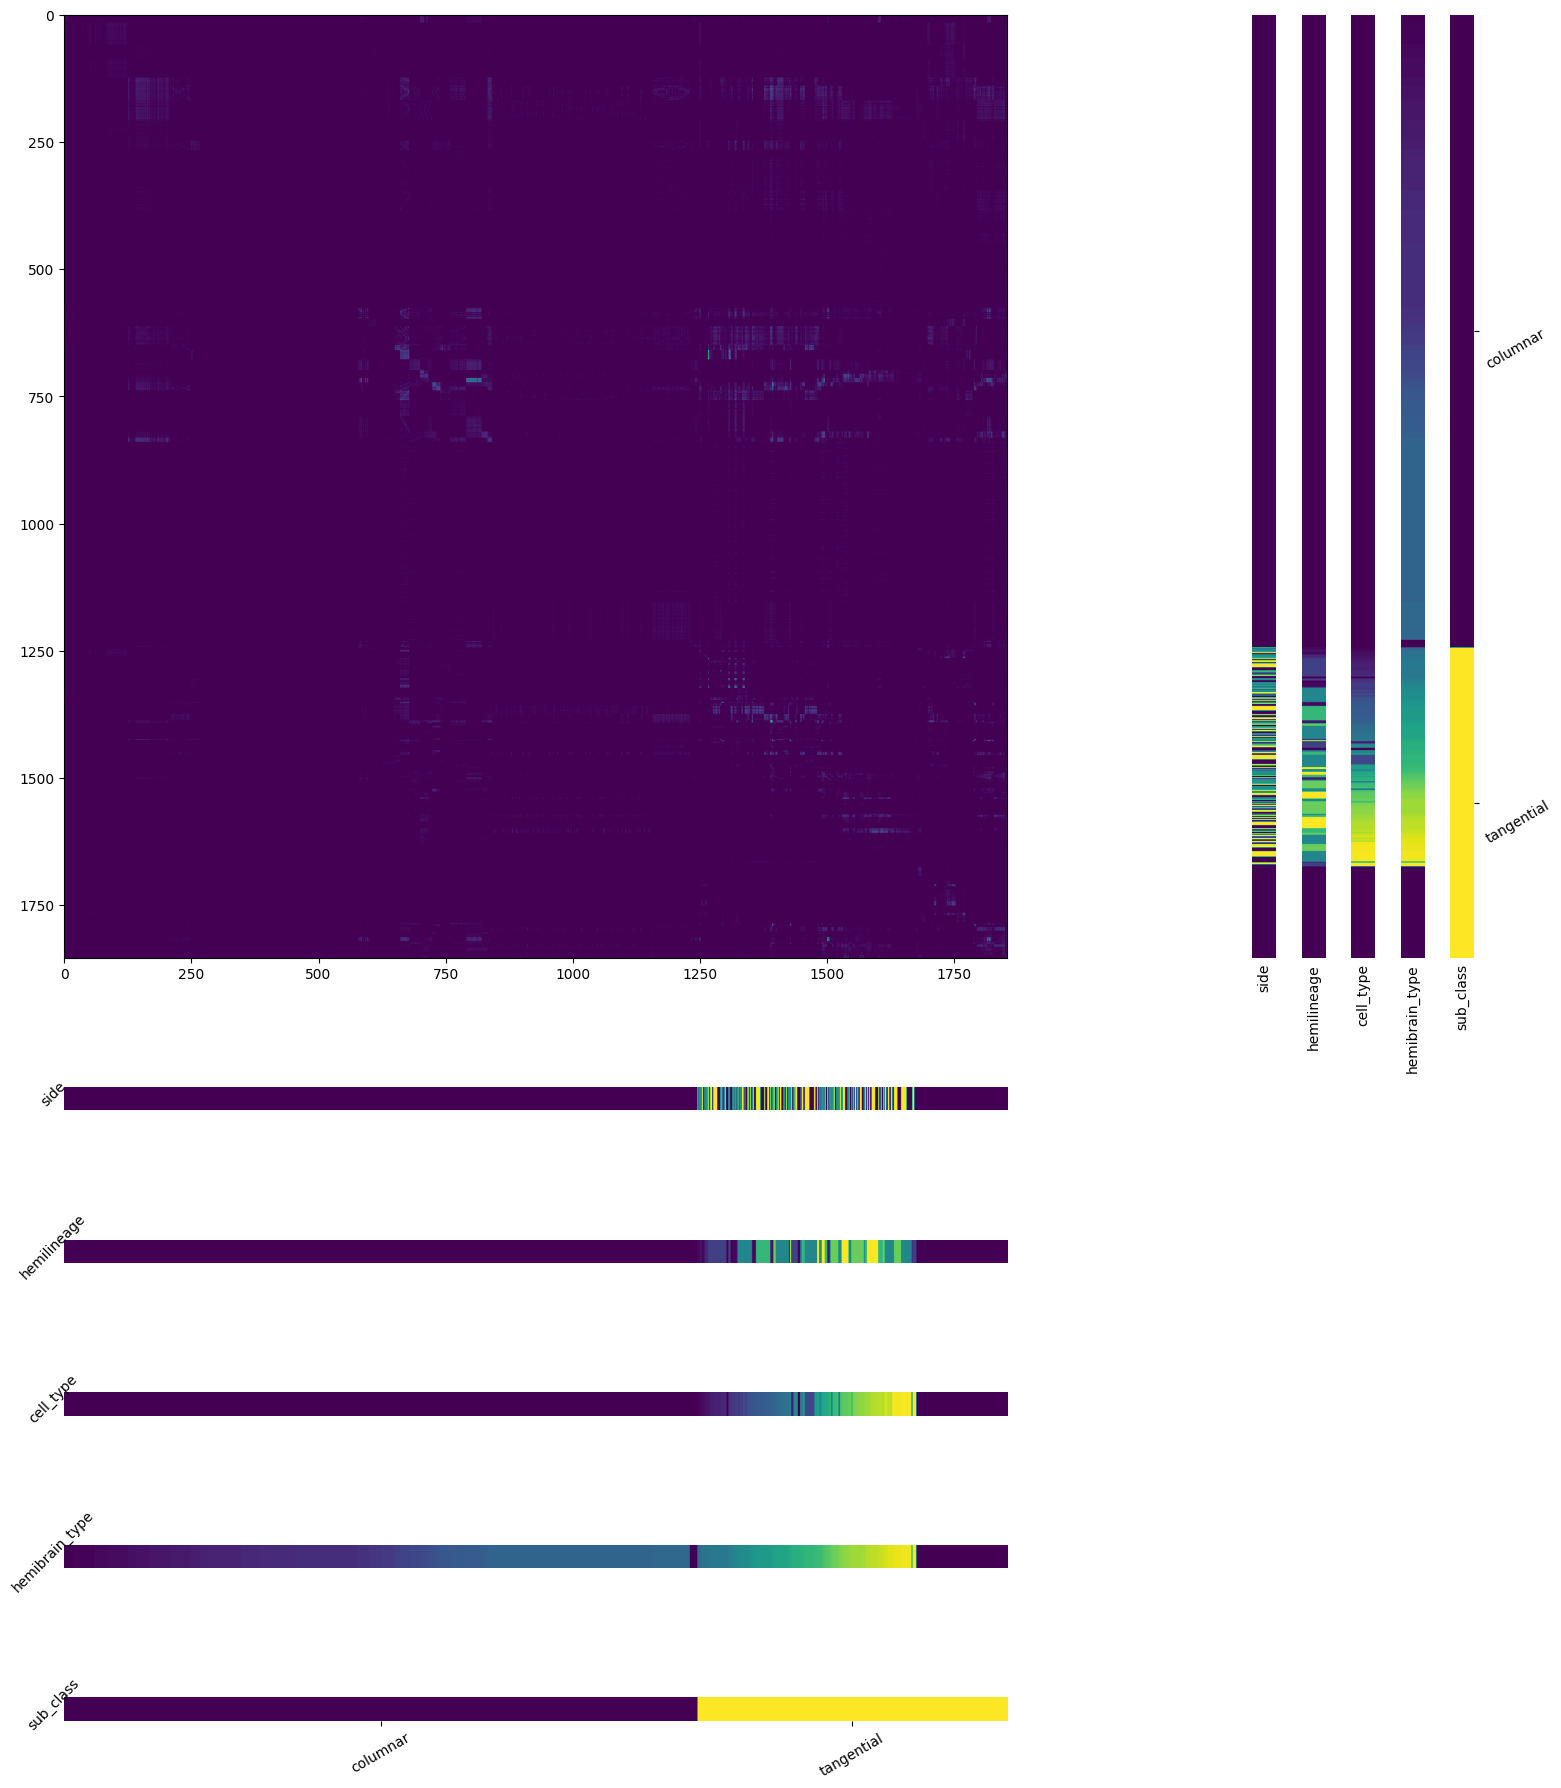

In [23]:
fb=neurons[(neurons['class']=='CX') & neurons['sub_class'].isin(['columnar','tangential'])]

fb_neurons, fb_J, fb_neurons_pre, fb_neurons_post, fb_nts_Js = filter_connectivity(fb,fb, J, nts_Js)
plot_connectivity(fb_neurons_pre, fb_neurons_post, fb_J.todense(), input_tick_labels=1, output_tick_labels=1)

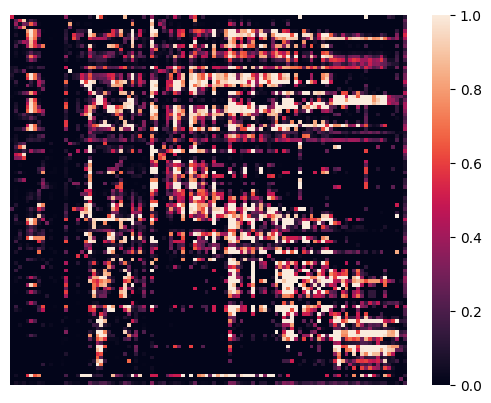

In [24]:
plot_connection_probability(fb_neurons_pre, fb_neurons_post, fb_J.todense(), include_xticks=False, include_yticks=False)

### Central Complex

We can also extract e.g. the central complex which is a region important for navigation (and sleep) and which contains the ring neurons, hulse et al. figure 17 neurons, and the tangential and columnar neurons.



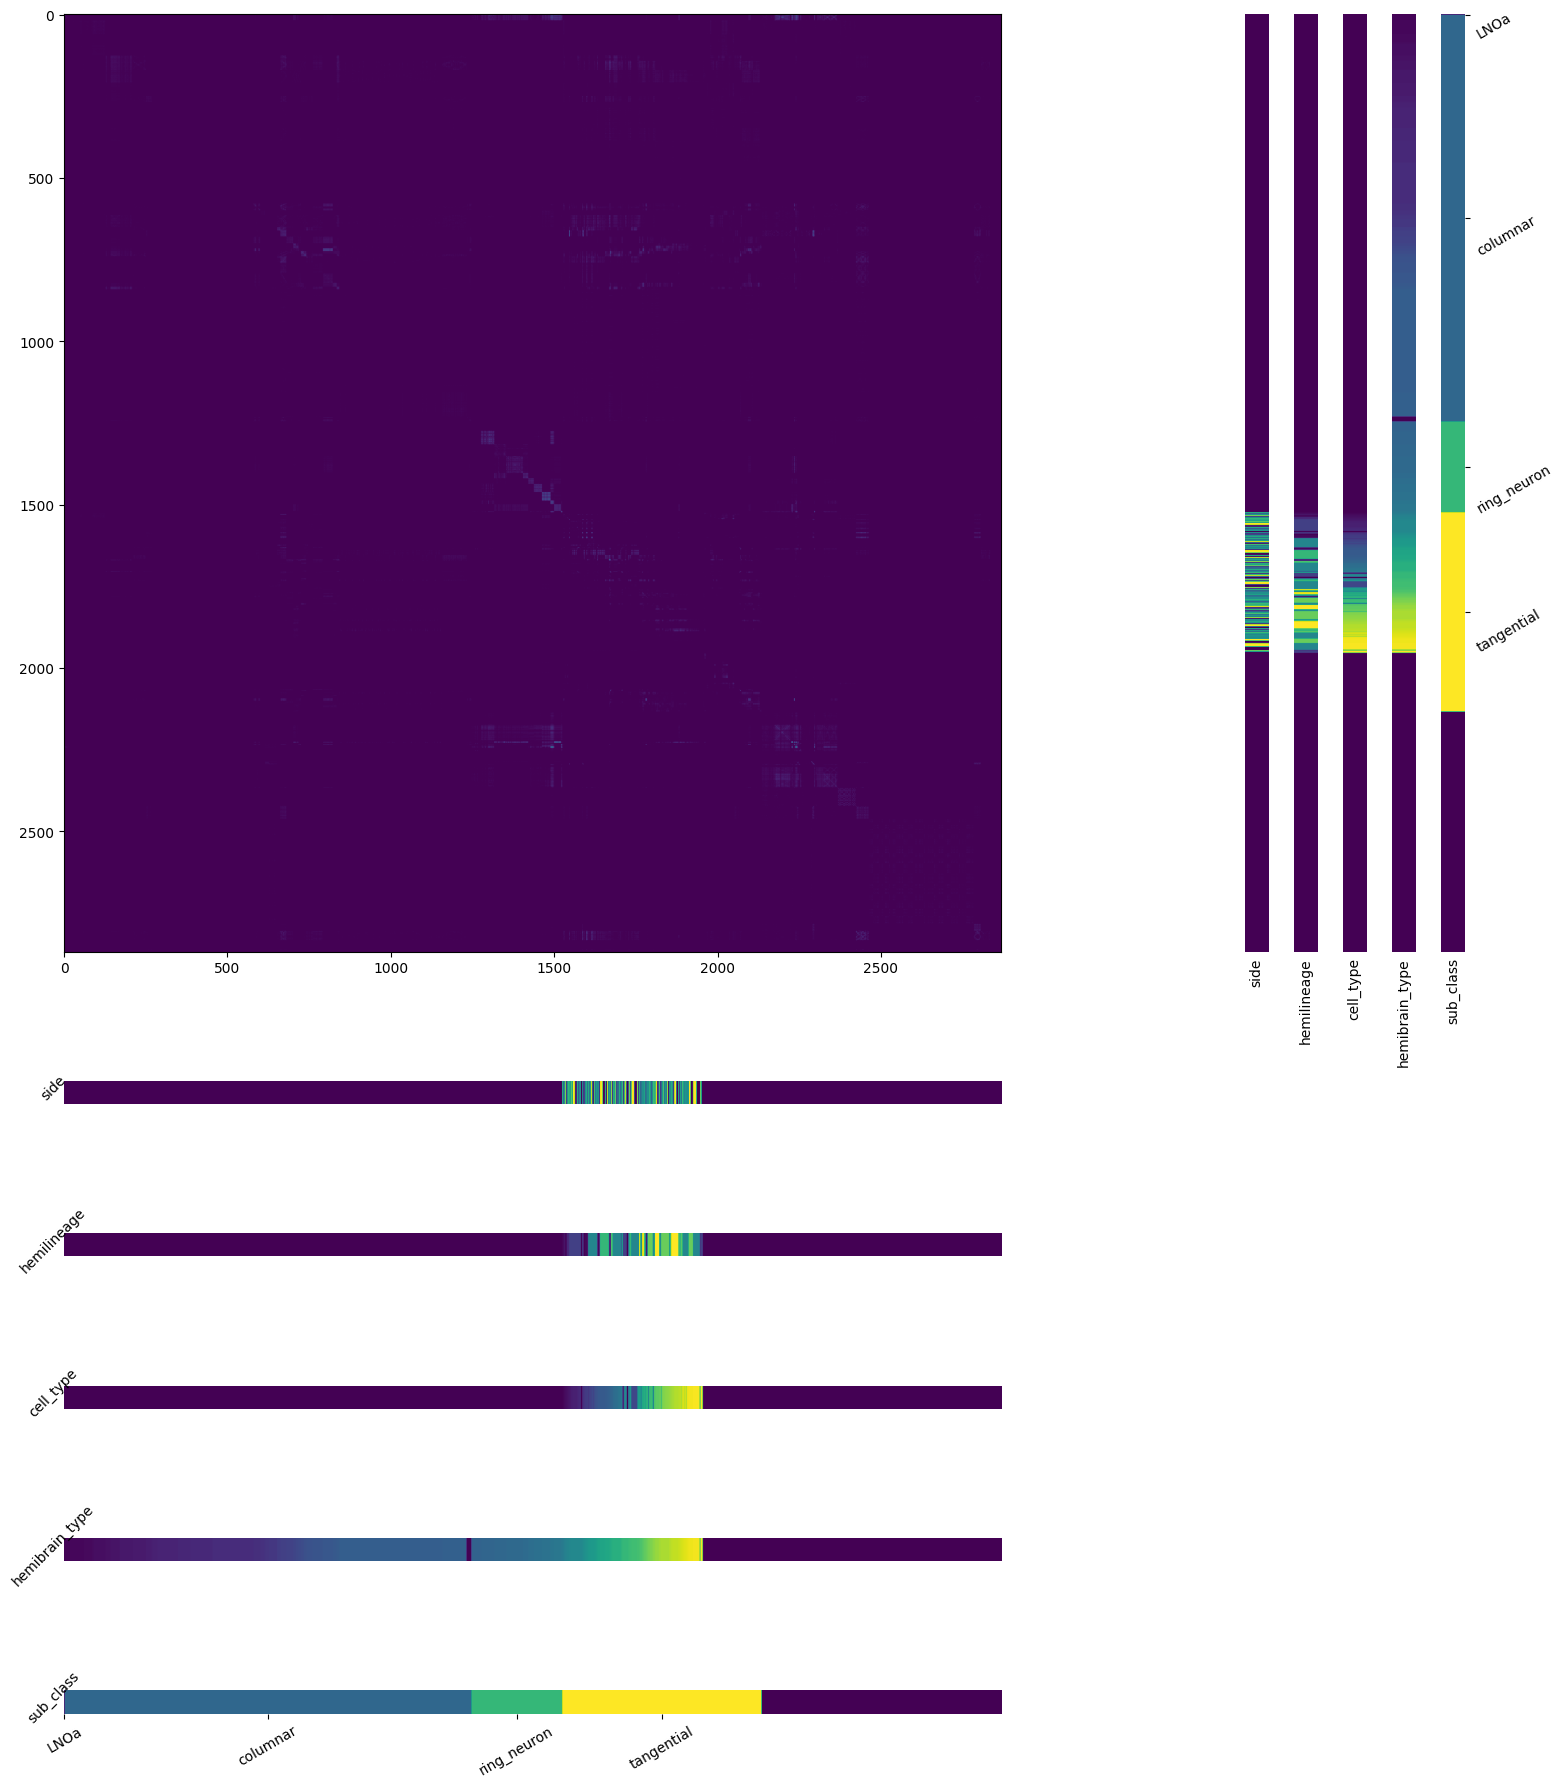

In [25]:
cx=neurons[(neurons['class']=='CX') ]

cx_neurons, cx_J, cx_neurons_pre, cx_neurons_post, cx_nts_Js = filter_connectivity(cx,cx, J, nts_Js)
plot_connectivity(cx_neurons_pre, cx_neurons_post, cx_J.todense(), input_tick_labels=1, output_tick_labels=1)

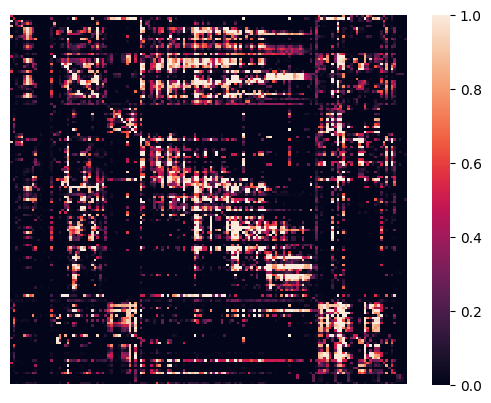

In [26]:
plot_connection_probability(cx_neurons_pre, cx_neurons_post, cx_J.todense(), include_xticks=False, include_yticks=False)

### pre-motor and motor? LAL to descending neurons

The lateral accessory lobe seems important for some motor circuits and makes lots of connections to descending neurons which project out of the brain to the ventral nerve cord where they can contact motor neurons. 

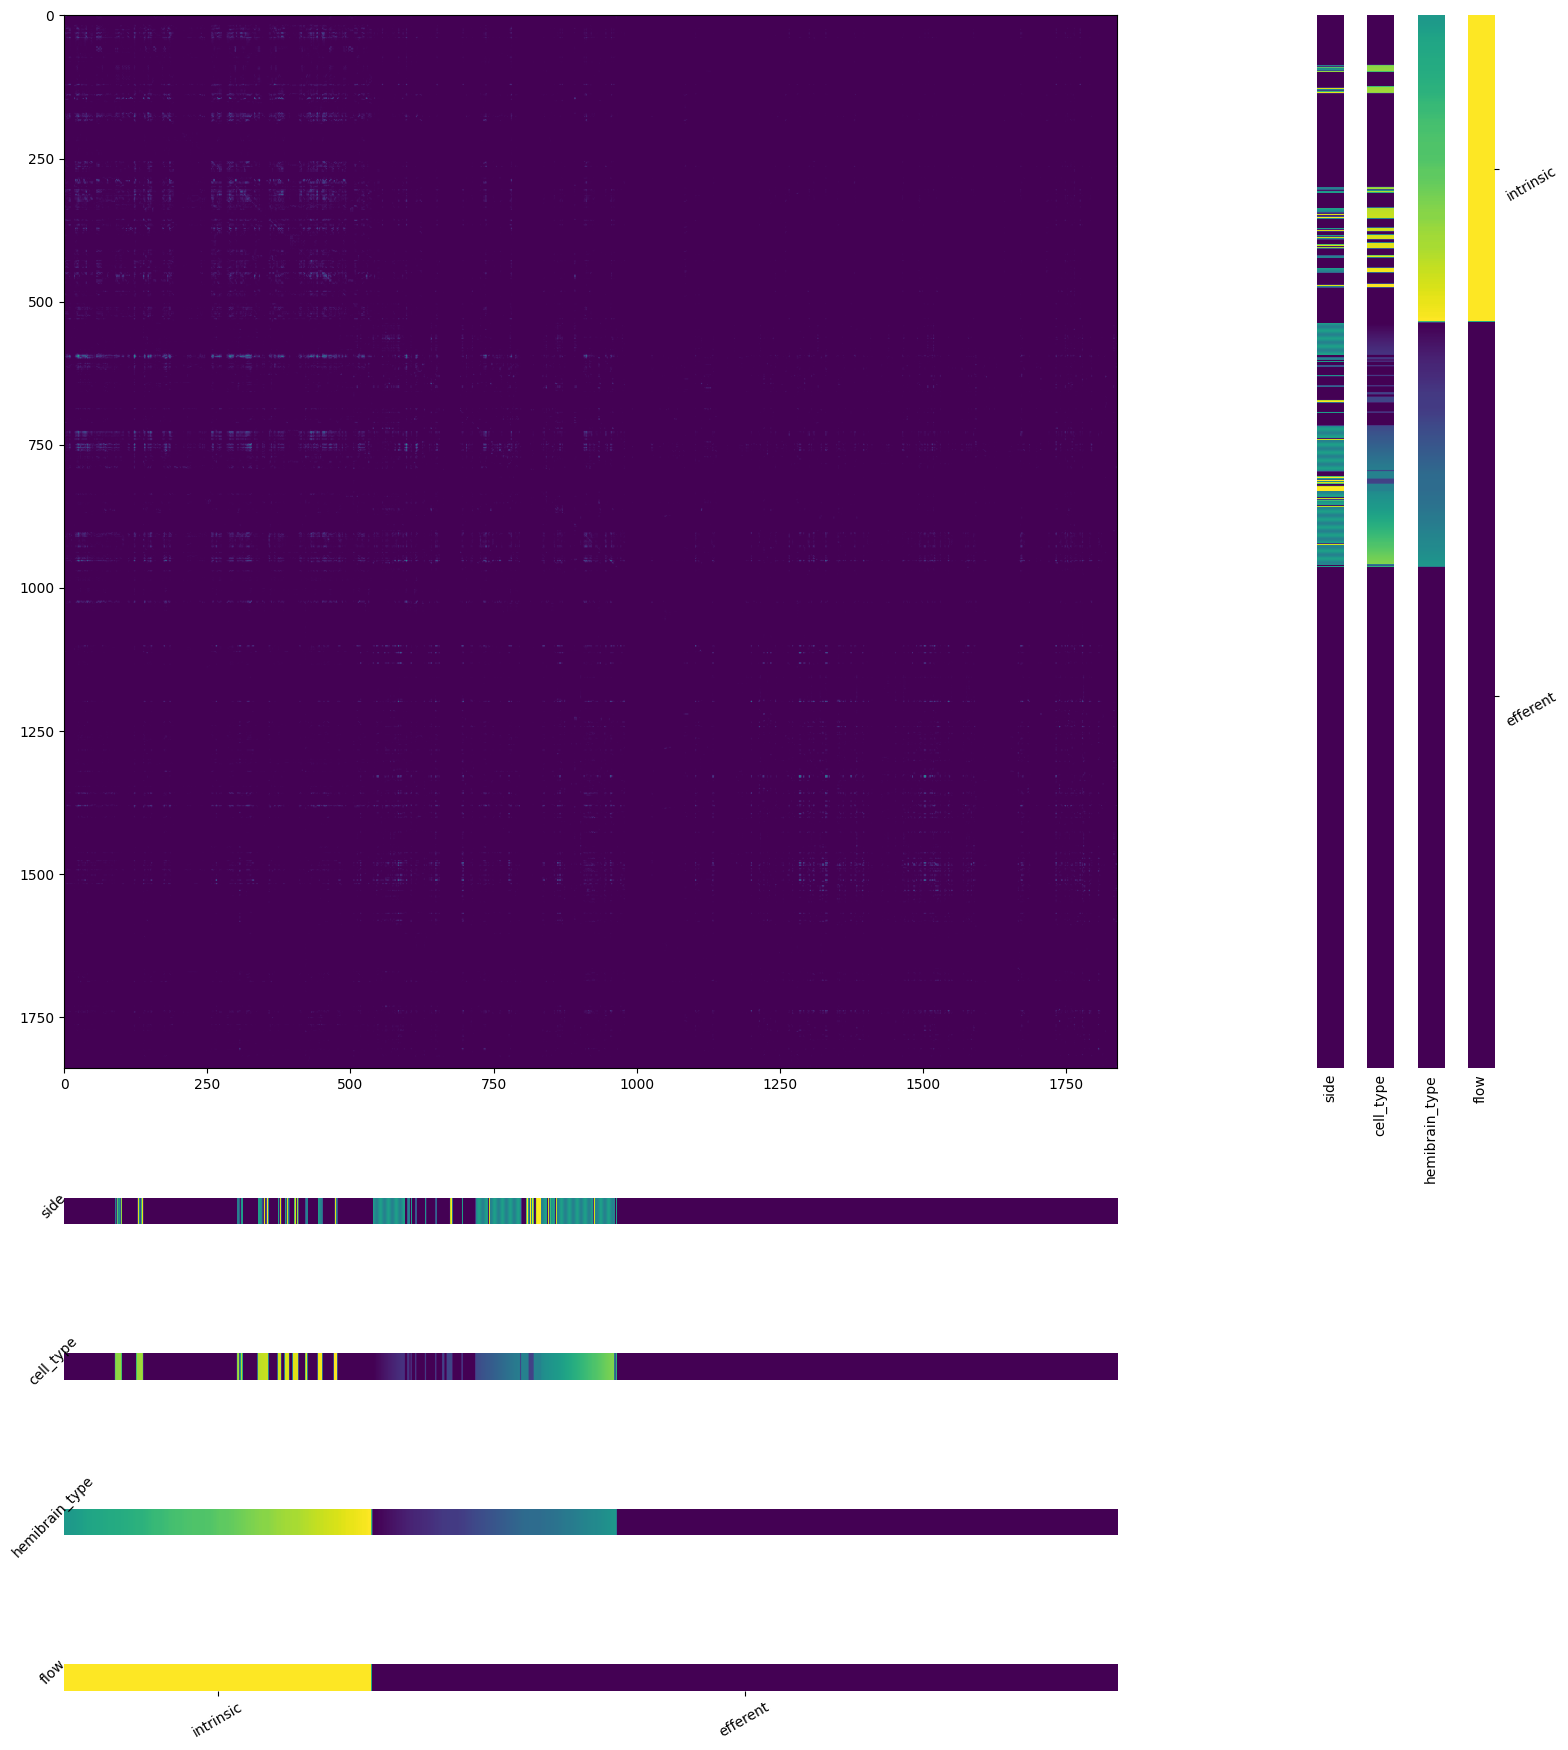

In [27]:
laldn = neurons[(neurons.super_class=='descending')|neurons.hemibrain_type.apply(lambda x: 'LAL' in str(x))]
laldn_neurons, laldn_J, laldn_neurons_pre, laldn_neurons_post, laldn_nts_Js = filter_connectivity(laldn,laldn, J, nts_Js)
plot_connectivity(laldn_neurons_pre, laldn_neurons_post, laldn_J.todense(), output_tick_labels=1, input_tick_labels=1)

### whole brain

We can also plot the connection probabilities across the whole brain.

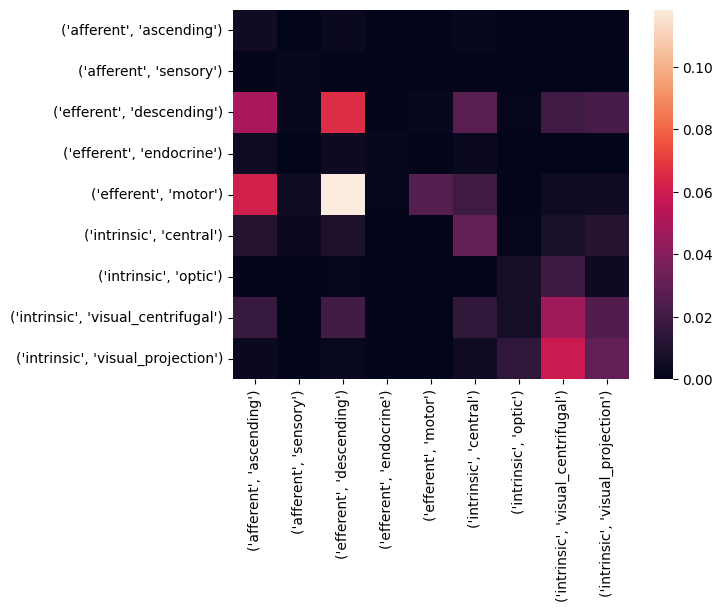

In [28]:
plot_connection_probability(neurons, neurons, J)